In [53]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads_new.csv to Social_Network_Ads_new.csv


In [54]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads_new.csv')

In [55]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

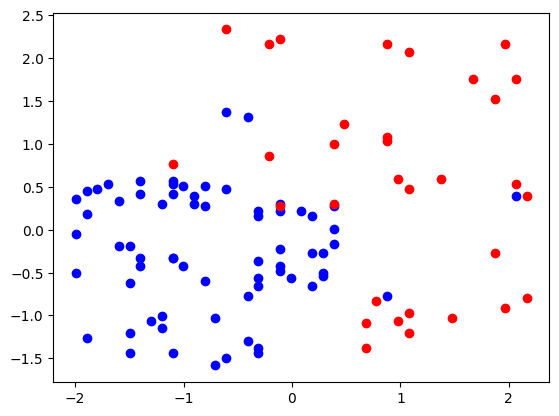

In [56]:
import matplotlib.pyplot as plt
import numpy as np

ind0 = np.where(y_test==0)
ind1 = np.where(y_test==1)

x0 = x_test[ind0,0]
y0 = x_test[ind0,1]

x1 = x_test[ind1,0]
y1 = x_test[ind1,1]

plt.scatter(x0,y0,color='blue')
plt.scatter(x1,y1,color='red')
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
w = classification_report(y_test,y_pred)

print(acc*100)
print(cm)
print(w)

89.0
[[65  3]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn_classifier.fit(x_train,y_train)
y_pred=knn_classifier.predict(x_test)

In [62]:
acc_knn=accuracy_score(y_test, y_pred)
cm_knn=confusion_matrix(y_pred,y_test)
w = classification_report(y_test,y_pred)
print('Accuracy of KNN:',acc_knn*100)

print(cm_knn)
print(w)

Accuracy of KNN: 93.0
[[64  3]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



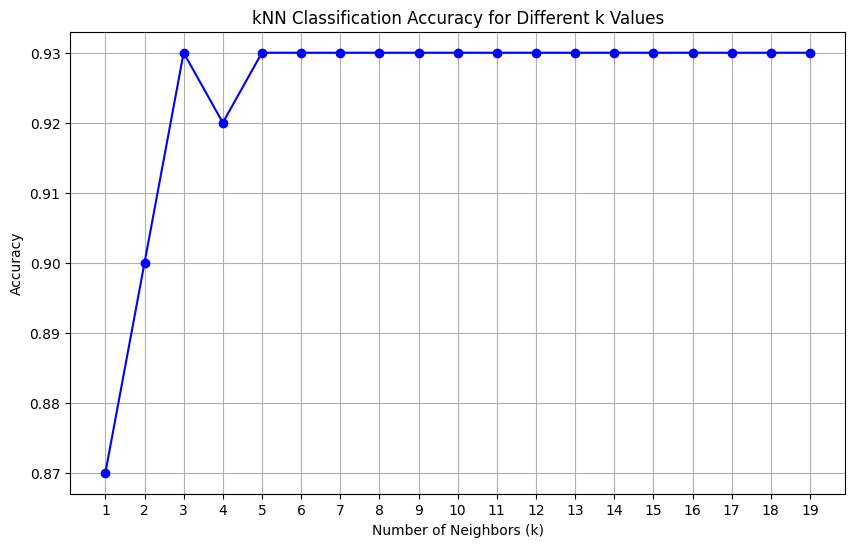

In [27]:
k_values = range(1, 20)

accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=2,metric='minkowski')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# plotting Accuracy for different values of k
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('kNN Classification Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [63]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

x, y = breast_cancer.data, breast_cancer.target

print(f"Breast Cancer features: {breast_cancer.feature_names}")
print(f"Breast Cancer target: {breast_cancer.target_names}")



Breast Cancer features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast Cancer target: ['malignant' 'benign']


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {x_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (455, 30), y_train: (455,)
Shape of X_test: (114, 30), y_test: (114,)


In [69]:
from sklearn.tree import DecisionTreeClassifier

dt_sklearn = DecisionTreeClassifier(max_depth=2)
dt_sklearn.fit(x_train, y_train)

dt_skl_predictions = dt_sklearn.predict(x_test)

R = classification_report(y_test, dt_skl_predictions)
print(R)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.92      0.97      0.95        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_sklearn = RandomForestClassifier(n_estimators=7, max_depth=2, random_state=42)
rf_sklearn.fit(x_train, y_train.ravel())

rf_skl_predictions = rf_sklearn.predict(x_test)

R = classification_report(y_test, rf_skl_predictions)
print(R)

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [71]:
import xgboost as xgb
xgb_sklearn = xgb.XGBClassifier(n_estimators=7, max_depth=2, random_state=42)
xgb_sklearn.fit(x_train, y_train)

R = classification_report(y_test, xgb_sklearn.predict(x_test))
print(R)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [76]:
from sklearn.datasets import load_iris
import numpy as np


iris = load_iris()
x = iris.data
y = iris.target

print(x.shape)
print(np.max(y))



(150, 4)
2


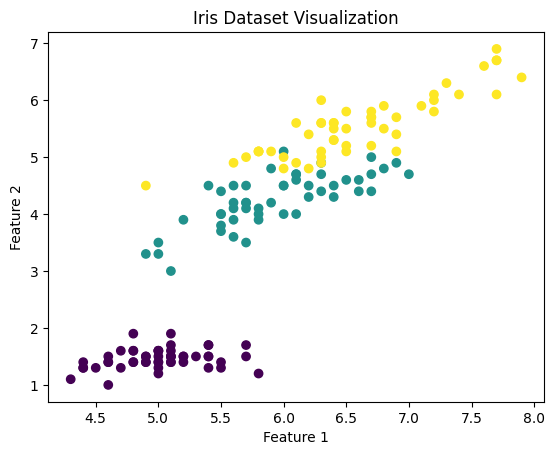

In [86]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 2], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris Dataset Visualization')
plt.show()

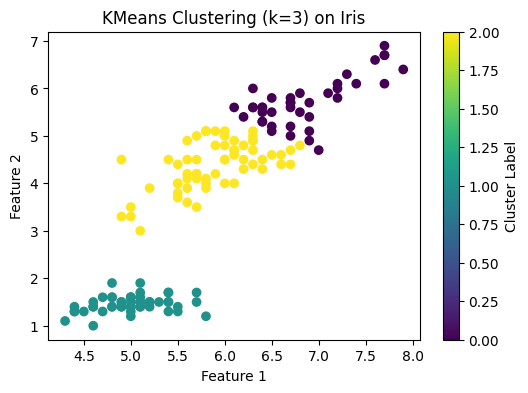

In [85]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(x)

# Plot KMeans results
plt.figure(figsize=(6, 4))
plt.scatter(x[:, 0], x[:, 2], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering (k=3) on Iris")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()



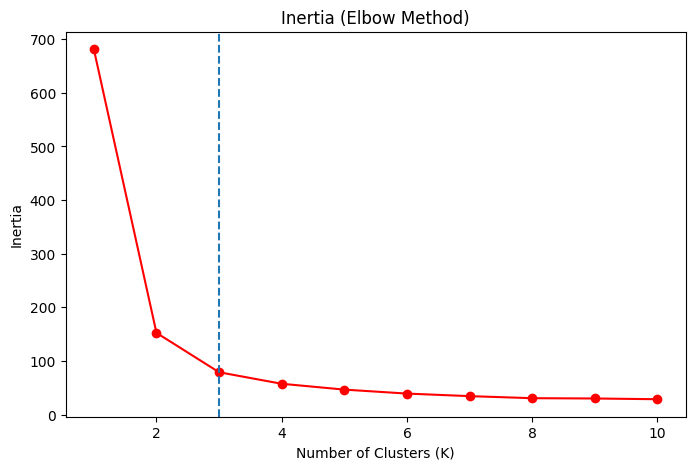

In [87]:
# Inertia (Elbow Method)
def compute_inertia(X, max_k=10):
    inertia_vals = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_vals.append(kmeans.inertia_)
    return inertia_vals

inertia_vals = compute_inertia(x, max_k=10)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_vals, marker='o', color="red")
plt.axvline(x=3, ls='--')
plt.title('Inertia (Elbow Method)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [42]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y, kmeans_labels)
print(ari)

0.7163421126838476


In [43]:
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(y, kmeans_labels)

print(nmi)


0.7419116631817836


In [88]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(x, kmeans_labels)

print(silhouette)


0.551191604619592


Number of clusters: 2
Number of noise points: 0


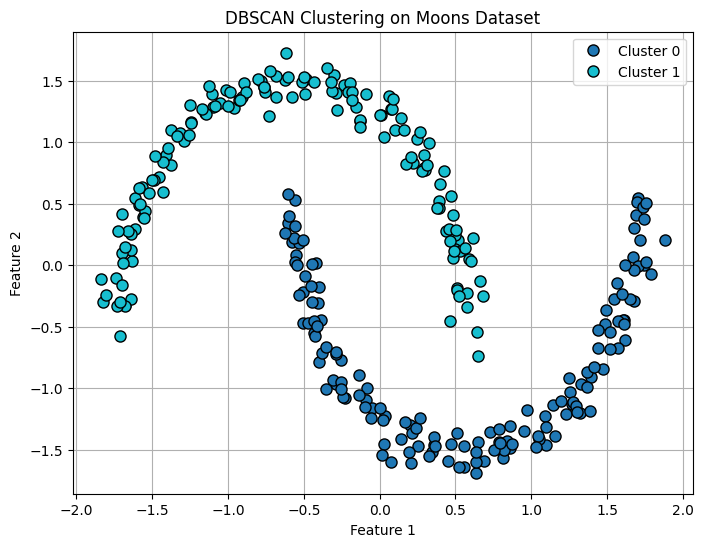

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


X, y = make_moons(n_samples=300, noise=0.05, random_state=0)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


db = DBSCAN(eps=.5)
db.fit(X_scaled)


labels = db.labels_


n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")


plt.figure(figsize=(8, 6))
unique_labels = set(labels)

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
for label, color in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = X_scaled[class_member_mask]
    if label == -1:
        plt.plot(xy[:, 0], xy[:, 1], 'k+', label='Noise')
    else:
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=color,
                 markeredgecolor='k', markersize=8, label=f'Cluster {label}')

plt.title('DBSCAN Clustering on Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
